# DrugAge data analysis

## Introduction
Welcome to the second bioinformatics data analysis project of the Drugage dataset. The DrugAge Database of Anti-Ageing Drugs contains an extensive compilation of drugs, compounds and supplements (including natural products and nutraceuticals) with anti-ageing properties that extend longevity in model organisms. More information can be found on the official [website](https://genomics.senescence.info/drugs/).

### Objectives
1. Data cleaning with SQL
    - Focus on the species *Drosophila melanogaster*.
    - Include only compounds that show a maximum lifespan change greater than *10%*.
    - Ensure the results are statistically significant.
    - Filter by gender, including only *Male* and *Female*.
    - Consider only those records where the dosage is less than or equal to *5%*.

2. Plot the average and maximum lifespan change for each compound and gender
    - Convert the dosage column from a percentage string to a float.
    - Calculate the average and maximum lifespan changes for each compound, grouped by gender.
    - Use seaborn and matplotlib to create a combined bar (average lifespan change) and line plot (maximum lifespan change).

3. Calculate summary statistics and create box plots of the average and maximum lifespan changes
    - Identify the compound with the highest average lifespan change.

4. Create an interactive pie chart that visualizes the gender distribution

#### 1. Data cleaning with SQL

In [ ]:
SELECT *
FROM drugage
WHERE species = 'Drosophila melanogaster'
	AND max_lifespan_change > 10
    AND significance = 'S'
    AND gender IN ('Male', 'Female')
    AND dosage <= '5%';

#### 2. Plot the average and maximum lifespan change for each compound and gender

Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st s

Extract the data from the CSV file

In [2]:
df = pd.read_csv('D:/Programming/pydir/Apps/tutorial/drugage/drugage_filtered.csv', delimiter = ';')

Inspect the first rows of the data

In [ ]:
df.head()

,compound_name,cas_number,species,strain,dosage,avg_lifespan_change,max_lifespan_change,gender,significance,pubmed_id
0,magnesium L-thiazolidine-4-carboxylate,unknown,Drosophila melanogaster,Oregon-R,0.2%,16.0,17.00,Male,S,118043
1,2-Ethyl-6-methylpyridin-3-ol hydrochloride,13258-59-8,Drosophila melanogaster,D32,0.1%,23.0,21.00,Female,S,119648
2,2-Ethyl-6-methylpyridin-3-ol hydrochloride,13258-59-8,Drosophila melanogaster,D32,0.01%,18.0,2.32,Female,S,119648
3,2-Ethyl-6-methylpyridin-3-ol hydrochloride,13258-59-8,Drosophila melanogaster,D32,0.1%,14.3,-2.73,Male,S,119648
4,2-Ethyl-6-methylpyridin-3-ol hydrochloride,13258-59-8,Drosophila melanogaster,D32,0.01%,20.4,12.40,Male,S,119648


Convert the dosage column from a percentage string to a float

In [4]:
df['dosage'] = df['dosage'].str.rstrip('%').astype('float')

Check the levels of Gender column

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

Remove the *Unknown* rows from gender

In [6]:
df = df[df['gender'] != 'Unknown']

Calculate average lifespan changes

In [37]:
# Group the data by 'compound' and 'gender', then calculate the average lifespan change for each group
average_lifespan_changes = df.groupby(['compound_name', 'gender'])['avg_lifespan_change'].mean().reset_index()

# Rename the columns for clarity
average_lifespan_changes.columns = ['compound', 'gender', 'average_lifespan_change']

# Display the result
average_lifespan_changes.head()

,compound,gender,average_lifespan_change
0,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Female,8.320
1,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Male,17.925
2,3:1 Mixture: salicyl-salicylic acid + aspirin,Female,12.000
3,3:1 Mixture: salicyl-salicylic acid + aspirin,Male,31.000
4,Cordyceps sinensis oral liquid,Male,32.000


Calculate maximum lifespan change

In [38]:
# Group the data by 'compound' and 'gender', then calculate the maximum lifespan change for each group
max_lifespan_changes = df.groupby(['compound_name', 'gender'])['max_lifespan_change'].max().reset_index()

# Rename the columns for clarity
max_lifespan_changes.columns = ['compound', 'gender', 'max_lifespan_change']

# Display the result
max_lifespan_changes.head()

,compound,gender,max_lifespan_change
0,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Female,21.0
1,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Male,17.0
2,3:1 Mixture: salicyl-salicylic acid + aspirin,Female,43.0
3,3:1 Mixture: salicyl-salicylic acid + aspirin,Male,18.0
4,Cordyceps sinensis oral liquid,Male,15.4


Group the data by gender and compound, and then calculate the average and maximum lifespan changes for each group

In [ ]:
grouped_data = df.groupby(['compound_name', 'gender']).agg(
    average_lifespan_change=('avg_lifespan_change', 'mean'),
    max_lifespan_change=('max_lifespan_change', 'max')
).reset_index()

# Display the result
grouped_data.head()

,compound_name,gender,average_lifespan_change,max_lifespan_change
0,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Female,8.320,21.0
1,2-Ethyl-6-methylpyridin-3-ol hydrochloride,Male,17.925,17.0
2,3:1 Mixture: salicyl-salicylic acid + aspirin,Female,12.000,43.0
3,3:1 Mixture: salicyl-salicylic acid + aspirin,Male,31.000,18.0
4,Cordyceps sinensis oral liquid,Male,32.000,15.4


Use Seaborn and matplotlib to create a combined bar (average lifespan change) and line plot (maximum lifespan change)

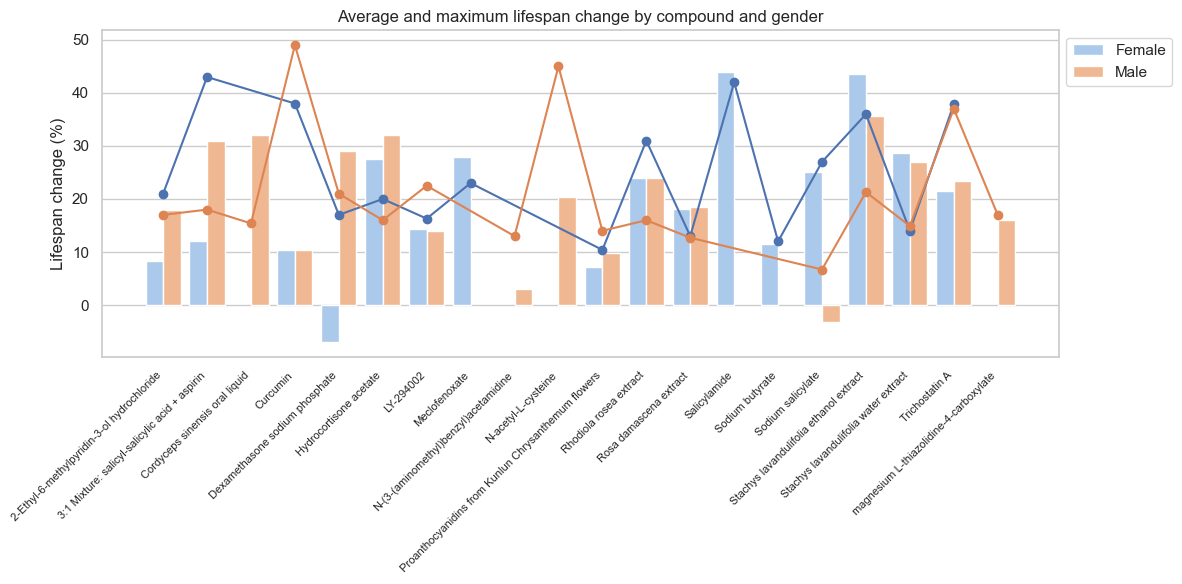

In [ ]:
# Use Seaborn and matplotlib to create a combined bar (average lifespan change) and line plot (maximum lifespan change)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Bar plot
bar_plot = sns.barplot(
    x="compound_name",
    y="average_lifespan_change",
    hue="gender",
    data=grouped_data,
    palette="pastel"
)

# Overlaying line plot
for gender in grouped_data["gender"].unique():
    gender_data = grouped_data[grouped_data["gender"] == gender]
    plt.plot(
        gender_data["compound_name"],
        gender_data["max_lifespan_change"],
        marker="o"
    )

# Customization
plt.title("Average and maximum lifespan change by compound and gender")
plt.xlabel("")
plt.ylabel("Lifespan change (%)")
plt.xticks(rotation=45, ha="right", fontsize = 8)
plt.legend(title="", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
            

#### 3. Calculate summary statistics and create box plots of the average and maximum lifespan changes

Calculate summary statistics using NumPy

In [ ]:
avg_lifespan_mean = np.mean(df['avg_lifespan_change'])
avg_lifespan_median = np.median(df['avg_lifespan_change'])
avg_lifespan_std = np.std(df['avg_lifespan_change'])
avg_lifespan_95ci = st.t.interval(confidence=0.95, 
                                  df=len(df)-1,
                                  loc=np.mean(df['avg_lifespan_change']),
                                  scale=st.sem(df['avg_lifespan_change']))

max_lifespan_mean = np.mean(df['max_lifespan_change'])
max_lifespan_median = np.median(df['max_lifespan_change'])
max_lifespan_std = np.std(df['max_lifespan_change'])
max_lifespan_95ci = st.t.interval(confidence=0.95, 
                                  df=len(df)-1,
                                  loc=np.mean(df['max_lifespan_change']),
                                  scale=st.sem(df['max_lifespan_change']))

Format 95% confidence intervals

In [99]:
# Convert np.float64 to Python float for cleaner display
avg_lifespan_95ci = tuple(float(x) for x in avg_lifespan_95ci)
max_lifespan_95ci = tuple(float(x) for x in max_lifespan_95ci)

# f-strings for formatted output
lower_avg_change, upper_avg_change = avg_lifespan_95ci
lower_max_change, upper_max_change = max_lifespan_95ci

95% Confidence Interval for Average Lifespan Change: (12.35, 12.35)
95% Confidence Interval for Average Lifespan Change: (11.06, 16.26)


Find the compound with the highest average lifespan change

In [70]:
highest_avg_lifespan_compound = df.loc[df['avg_lifespan_change'].idxmax()]['compound_name']

Identify the gender distribution for the compound with the highest average lifespan change

In [71]:
gender_distribution = df[df['compound_name'] == highest_avg_lifespan_compound]['gender'].value_counts()

Display the calculated statistics

In [101]:
print("Summary statistics:")
print(f"Average Lifespan Change - Mean: {avg_lifespan_mean:.2f}, Median: {avg_lifespan_median:.2f}, Std: {avg_lifespan_std:.2f}, 95% CI ({lower_avg_change:.2f}, {lower_avg_change:.2f})")
print(f"Maximum Lifespan Change - Mean: {max_lifespan_mean:.2f}, Median: {max_lifespan_median:.2f}, Std: {max_lifespan_std:.2f}, 95% CI ({lower_max_change:.2f}, {upper_max_change:.2f})")
print(f"Compound with Highest Average Lifespan Change: {highest_avg_lifespan_compound}")
print("Gender Distribution for the Compound with Highest Average Lifespan Change:")
print(gender_distribution)

Summary statistics:
Average Lifespan Change - Mean: 15.85, Median: 16.15, Std: 16.21, 95% CI (12.35, 12.35)
Maximum Lifespan Change - Mean: 13.66, Median: 11.30, Std: 12.06, 95% CI (11.06, 16.26)
Compound with Highest Average Lifespan Change: Stachys lavandulifolia ethanol extract
Gender Distribution for the Compound with Highest Average Lifespan Change:
   gender  count
0    Male      2
1  Female      2


Plot the results

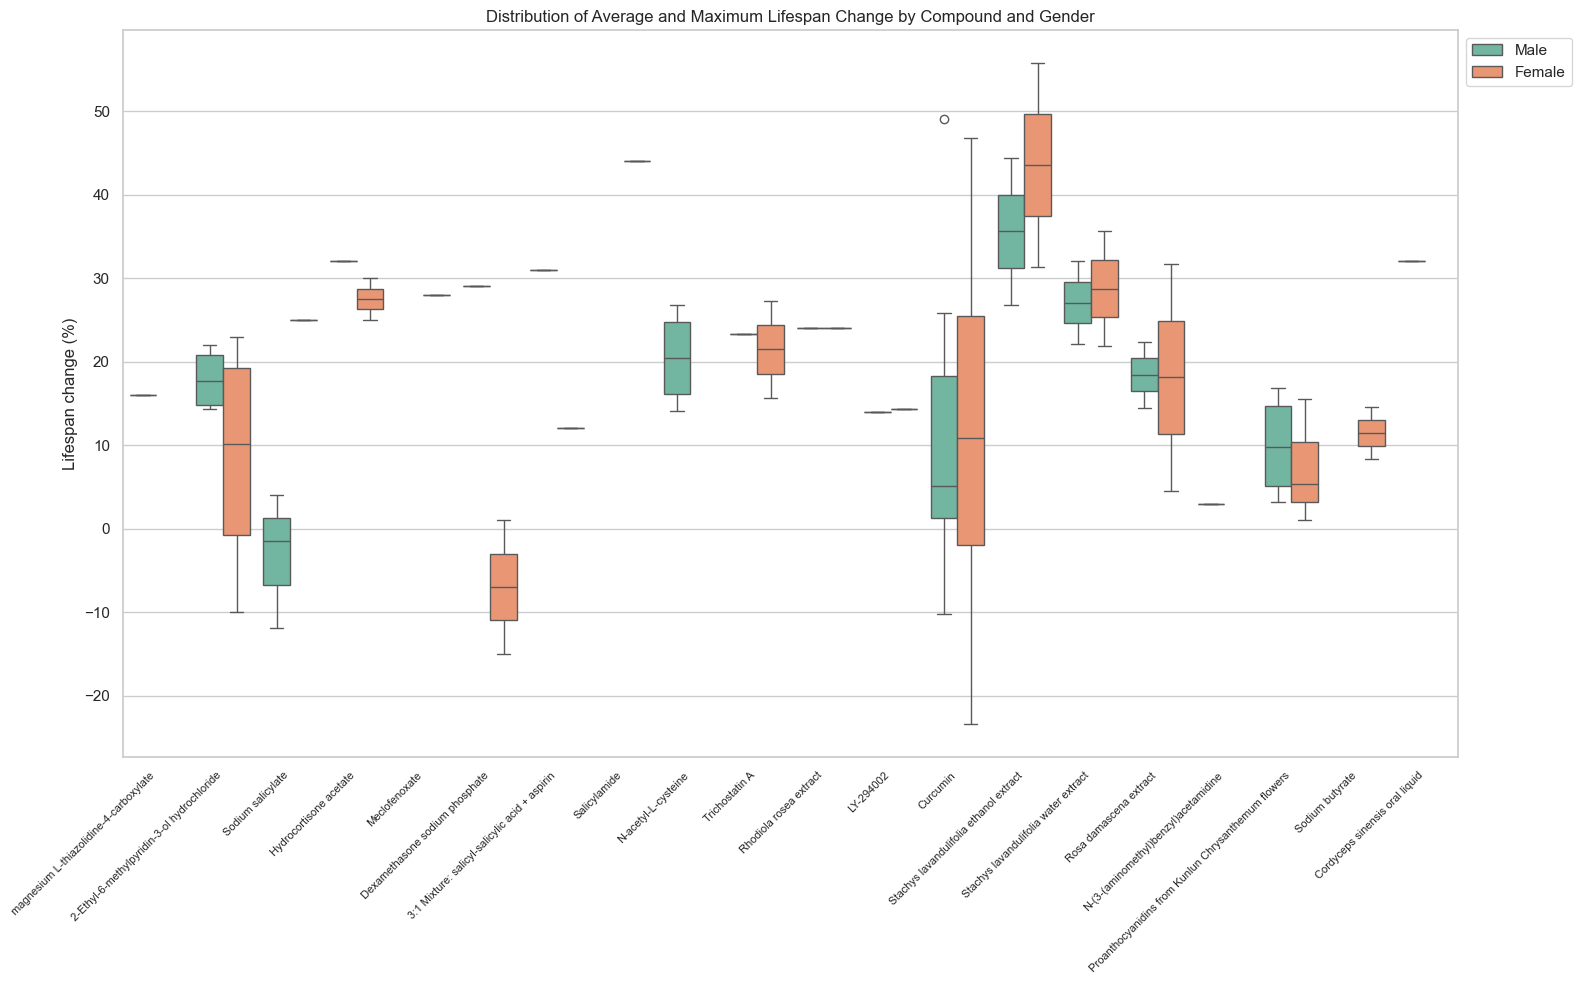

In [90]:
# Plotting the results
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Create a box plot for avg_lifespan_change and max_lifespan_change
box_plot = sns.boxplot(
    x='compound_name',
    y='avg_lifespan_change',
    hue='gender',
    data=df,
    palette='Set2'
)

# Customize the plot
plt.title('Average lifespan change by compound and gender')
plt.xlabel('')
plt.ylabel('Lifespan change (%)')
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.legend(title='', loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

#### 4. Create an interactive pie chart that visualizes the gender distribution

Calculate the gender distribution for the compound with the highest average lifespan change

In [91]:
gender_distribution = df[df['compound_name'] == highest_avg_lifespan_compound]['gender'].value_counts().reset_index()
gender_distribution.columns = ['gender', 'count']

Create an interactive pie chart using Plotly

In [93]:
import plotly.express as px

plt.figure(figsize=(8, 5))

fig = px.pie(
    gender_distribution,
    values='count',
    names='gender',
    title=f'Gender Distribution for Compound: {highest_avg_lifespan_compound}',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Customize the layout for better readability
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_x=0.5,
    legend_title_text='Gender',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

<Figure size 800x500 with 0 Axes>

#### Findings: DrugAge Data Analysis
In this analysis, we explored the dataset of drugs, compounds and supplements that extend longevity in model organisms. Here are the key findings:

- The compound with the highest average lifespan change was *Stachys lavandulifolia ethanol extract* and was equally distributed between female and male organisms.